# Analiza i projektiranje računalom #

### 4. Domaća zadaća -  _Genetski algoritam_ ###

Učitavanje potrebnih biblioteka.

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 3. Zadatak ###

Učitavanje podatka iz datoteka.

In [201]:
f6d3d = np.loadtxt('data/f6d3d.txt')
f6d6d = np.loadtxt('data/f6d6d.txt')
f7d3d = np.loadtxt('data/f7d3d.txt')
f7d6d = np.loadtxt('data/f7d6d.txt')
f6d3b = np.loadtxt('data/f6d3b.txt')
f6d6b = np.loadtxt('data/f6d6b.txt')
f7d3b = np.loadtxt('data/f7d3b.txt')
f7d6b = np.loadtxt('data/f7d6b.txt')

Funkcija koja ispisuje statistiku za zadani vektor.

In [202]:
def statistics(fitness_vector, tol=-1e-6):
    print('Broj pogodataka:', np.count_nonzero(fitness_vector > tol), '/', len(fitness_vector))
    print('Srednja vrijednost:', np.mean(fitness_vector))
    print('Medijan:           ', np.median(fitness_vector))
    print('Najbolja dobrota:  ', np.max(fitness_vector))

Statistika za funkciju **f6** dimenzije **3** i **decimalnog** prikaza.

In [203]:
statistics(f6d3d)

Broj pogodataka: 5 / 30
Srednja vrijednost: -0.007639416035773164
Medijan:            -0.00971590987751439
Najbolja dobrota:   -4.711979831872881e-07


Statistika za funkciju **f6** dimenzije **3** i **binarnog** prikaza.

In [204]:
statistics(f6d3b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.00971590987772016
Medijan:            -0.009715909877546725
Najbolja dobrota:   -0.009715909877514473


Statistika za funkciju **f6** dimenzije **6** i **decimalnog** prikaza.

In [205]:
statistics(f6d6d)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715911744564463
Medijan:            -0.00971590987751525
Najbolja dobrota:   -0.009715909877514362


Statistika za funkciju **f6** dimenzije **6** i **binarnog** prikaza.

In [206]:
statistics(f6d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715909895223206
Medijan:            -0.0097159098778693
Najbolja dobrota:   -0.009715909877514917


Statistika za funkciju **f7** dimenzije **3** i **decimalnog** prikaza.

In [207]:
statistics(f7d3d)

Broj pogodataka: 30 / 30
Srednja vrijednost: -9.306542901240587e-07
Medijan:            -9.413679960288481e-07
Najbolja dobrota:   -7.910210445361456e-07


Statistika za funkciju **f7** dimenzije **3** i **binarnog** prikaza.

In [208]:
statistics(f7d3b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.014198064481576154
Medijan:            -0.015161990864761195
Najbolja dobrota:   -0.007209012150852522


Statistika za funkciju **f7** dimenzije **6** i **decimalnog** prikaza.

In [209]:
statistics(f7d6d)

Broj pogodataka: 12 / 30
Srednja vrijednost: -0.00625597074507735
Medijan:            -0.005364481906723688
Najbolja dobrota:   -8.030097475390567e-07


Statistika za funkciju **f7** dimenzije **6** i **binarnog** prikaza.

In [210]:
statistics(f7d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.08679839311709034
Medijan:            -0.08687683639628674
Najbolja dobrota:   -0.015148849509952402


### 4. Zadatak ###

Učitavanje `population_sizes.csv` datoteke.

In [211]:
population_sizes_df = pd.read_csv('data/population_sizes.csv')

Srednje vrijednosti po populacijama:

In [212]:
population_sizes_df.mean()

30    -0.007664
50    -0.006353
100   -0.007643
200   -0.005523
dtype: float64

Medijani po populacijama:

In [213]:
population_sizes_df.median()

30    -0.009716
50    -0.008700
100   -0.009716
200   -0.006348
dtype: float64

Najbolje dobrote po populacijama:

In [214]:
population_sizes_df.max()

30    -8.905858e-07
50    -8.509363e-07
100   -6.381892e-07
200   -2.182848e-07
dtype: float64

**Boxplot** za `population_sizes_df`:

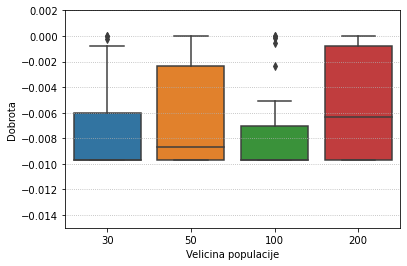

In [215]:
sns.boxplot(data=population_sizes_df)
plt.ylim(-0.015, 0.002)
plt.ylabel('Dobrota')
plt.xlabel('Velicina populacije')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

Učitavanje `mutations.csv` datoteke.

In [216]:
mutations_df = pd.read_csv('data/mutations.csv')

Srednje vrijednosti za mutacije:

In [217]:
mutations_df.mean()

0.1   -0.008906
0.3   -0.007984
0.6   -0.008247
0.9   -0.007147
dtype: float64

Medijani za mutacije:

In [218]:
mutations_df.median()

0.1   -0.009716
0.3   -0.009716
0.6   -0.009716
0.9   -0.009595
dtype: float64

Najbolje dobrote za mutacije:

In [219]:
mutations_df.max()

0.1   -9.923562e-07
0.3   -3.251114e-07
0.6   -7.862406e-07
0.9   -7.291678e-07
dtype: float64

**Boxplot** za `mutations_df`:

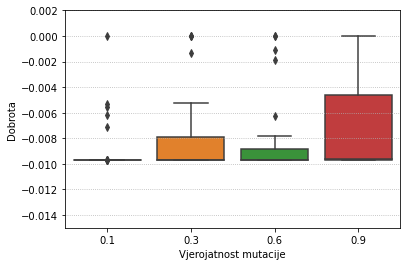

In [220]:
sns.boxplot(data=mutations_df)
plt.ylim(-0.015, 0.002)
plt.ylabel('Dobrota')
plt.xlabel('Vjerojatnost mutacije')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

### 5. Zadatak ###

Učitavanje `tournaments.csv` datoteke.

In [221]:
tournaments_df = pd.read_csv('data/tournaments.csv')

Srednje vrijednosti za turnire:

In [222]:
tournaments_df.mean()

3    -8.712006e-07
5    -8.332501e-07
10   -2.465595e-02
15   -4.192757e-02
20   -1.039856e-01
25   -1.399648e-01
30   -1.526740e-01
40   -2.006332e-01
50   -5.723470e-01
dtype: float64

Medijani za turnire:

In [223]:
tournaments_df.median()

3    -9.036471e-07
5    -8.604382e-07
10   -5.364482e-03
15   -3.134949e-02
20   -8.687684e-02
25   -1.278745e-01
30   -1.560421e-01
40   -2.399962e-01
50   -2.148413e-01
dtype: float64

Najbolje dobrote za turnire:

In [224]:
tournaments_df.max()

3    -6.312569e-07
5    -3.887903e-07
10   -6.944563e-07
15   -5.665929e-05
20   -5.364482e-03
25   -6.971512e-03
30   -5.365106e-03
40   -3.134949e-02
50   -5.496616e-02
dtype: float64

**Boxplot** za `tournaments_df`:

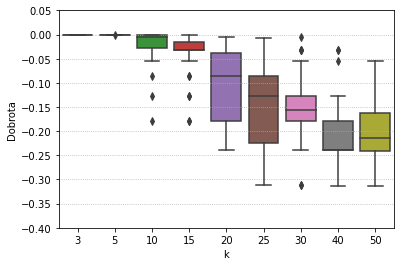

In [225]:
sns.boxplot(data=tournaments_df)
plt.ylim(-0.4, 0.05)
plt.ylabel('Dobrota')
plt.xlabel('k')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()